#### Exercise 7
#### Author: Md Rownak Abtahee Diganta 
#### Student ID: 301539632 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy

In [2]:
# Step 1: Load the data from the CSV into a DataFrame.
data_frame = pd.read_csv('dog_rates_tweets.csv',parse_dates = ['created_at']) # parsed the date as per the
                                                                              # instruction in Step 4
data_frame

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
14923,1273020398150414336,2020-06-16 22:31:29+00:00,@annacroweVO wait... https://t.co/lhCKSMfpfK
14924,1273020243196235777,2020-06-16 22:30:52+00:00,@friendlyrmndr we consulted canadians before p...
14925,1273019594601639938,2020-06-16 22:28:17+00:00,I know it’s been a while but we still only rat...
14926,1272937849118011392,2020-06-16 17:03:27+00:00,@Harry_Styles this is Sophie and she told me t...


In [3]:
# Step 2: Find tweets that contain an “n/10” rating (because not all do).
# Extract the numeric rating. Exclude tweets that don't contain a rating.

numeric_rating = data_frame['text'].str.extract(r'(\d+(\.\d+)?)/10') # Given hint
boolean_flag = numeric_rating[0].notna()                      # Getting all the boolen values which are not NaN 
Extracted_df = data_frame.loc[boolean_flag]                   # Extracting the rows which contains rating 
rate= pd.to_numeric(numeric_rating[0].dropna())               # Extracting Rating as a numeric value
Rate_series = pd.Series(data=rate,index = None,name = 'Rating') # Making a series  
Extracted_df = pd.concat([Extracted_df,Rate_series],axis = 1) # concatenating the series to the data frame as Rating Column
Extracted_df

,id,created_at,text,Rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0


In [4]:
# Step 3: Remove outliers: there are a few obvious ones.
#         Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)

Extracted_df_2 = Extracted_df[Extracted_df['Rating']<=25]
Extracted_df_2

,id,created_at,text,Rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0


In [5]:
# Step 4: Make sure the 'created_at' column is a datetime value, not a string.
#         You can either do this by applying a function that parses the string to a date 
#        (likely using strptime to create a datetime object), or by asking Pandas' read_csv function 
#        to parse dates in that column with a parse_dates argument.

# Used the 2nd method to make it date time. Look in step 1

# Extracted_df_2['created_at'] # It's dtype is datetime64[ns]. Hence, it satisfies the reruirement


In [6]:
# Linear Fitting (part) followng the instructions in the hint

def to_timestamp(argument): 
    return argument.timestamp()
Extracted_df_2['created_at'] = pd.to_datetime(Extracted_df_2['created_at'],format='ISO8601') # used format as it was instructed in the error to do so
timestamp_data = Extracted_df_2['created_at'].apply(to_timestamp)  # saving data in a variable 
timestamp_series = pd.Series(data = timestamp_data,index= None,name ='timestamp') # Making a series
Extracted_df_2 = pd.concat([Extracted_df_2,timestamp_series],axis = 1) # concatenating series as a  
                                                                       # column(named timestamp) to the data frame 
Extracted_df_2['timestamp']

/tmp/ipykernel_22958/1113523159.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  Extracted_df_2['created_at'] = pd.to_datetime(Extracted_df_2['created_at'],format='ISO8601') # used format as it was instructed in the error to do so
/tmp/ipykernel_22958/1113523159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Extracted_df_2['created_at'] = pd.to_datetime(Extracted_df_2['created_at'],format='ISO8601') # used format as it was instructed in the error to do so


2        1.525910e+09
7        1.525797e+09
8        1.525735e+09
24       1.525394e+09
30       1.525285e+09
             ...     
14885    1.592936e+09
14895    1.592843e+09
14896    1.592776e+09
14906    1.592526e+09
14917    1.592424e+09
Name: timestamp, Length: 2116, dtype: float64

In [7]:
# fit line (given in the hint)
fit = scipy.stats.linregress(Extracted_df_2['timestamp'],Extracted_df_2['Rating'])


In [8]:
fit.slope,fit.intercept

(1.5000503986105543e-08, -10.585967528906664)

In [9]:
# In the hint it is given that , we have to plot  data['created_at'] against 
# data['timestamp']*fit.slope + fit.intercept to get a fit line
# (assuming you stored the results of linregress in a variable fit).
# In the given picture there was a extra column named prediction. This indicates 
# data['timestamp']*fit.slope + fit.intercept is basically prediction 

prediction_data = Extracted_df_2['timestamp']*fit.slope + fit.intercept  # saving data in a variable 
prediction_series = pd.Series(data = prediction_data, index = None, name = 'prediction') # Making a series
Extracted_df_2 = pd.concat([Extracted_df_2,prediction_series],axis = 1)# concatenating series as a  
                                                                       # column(named prediction) to the data frame 
Extracted_df_2



,id,created_at,text,Rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.303448
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.301750
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.300822
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.295704
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.294079
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308880
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307480
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306478
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302732


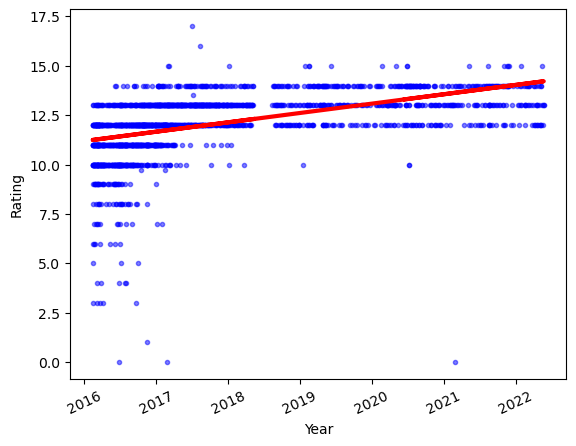

In [10]:
# Step 5: Create a scatter plot of date vs rating, so you can see what the data looks like.
plt.xticks(rotation = 25)
plt.plot(Extracted_df_2['created_at'],Extracted_df_2['Rating'],'b.',alpha = 0.5)
plt.plot(Extracted_df_2['created_at'],Extracted_df_2['prediction'],'r-',linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()


In [11]:
# Output the p-value from the regression for the question “is the slope different from zero?”
regression_pvalue = fit.pvalue
regression_pvalue


2.607038813965922e-127

In [12]:
# plot a histogram of the residuals (observed values minus predicted values)

# Creating residuals column 
Extracted_df_2['residuals'] = Extracted_df_2['Rating'] - Extracted_df_2['prediction']
Extracted_df_2

,id,created_at,text,Rating,timestamp,prediction,residuals
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.303448,1.696552
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.301750,0.698250
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.300822,1.699178
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.295704,0.704296
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.294079,0.705921
...,...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308880,0.691120
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307480,-0.307480
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306478,-0.306478
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302732,-1.302732


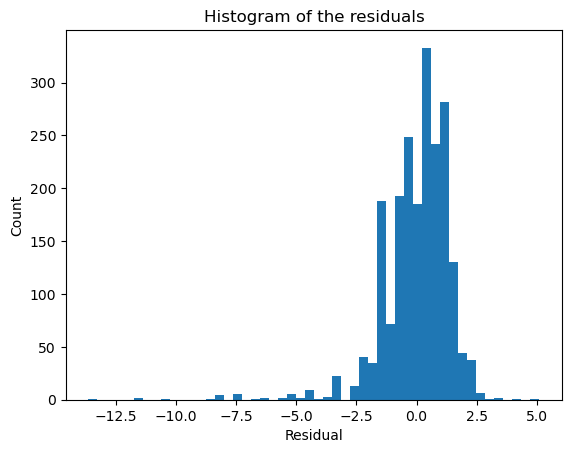

In [13]:
# Ref: https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/ (Gained knowledge)

plt.hist(Extracted_df_2['residuals'],bins = 50, histtype = 'bar')
plt.title('Histogram of the residuals')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()